# Train a NN to predict which volume a track will hit in next

Taking a series of real-space coordinates forming the start of a true track, I want to predict which volume the next hit will fall in (or if there will not be any more hits). I will train an LSTM to take as inputs a sequence of hit coordinates, and output a one-hot encoding of the prediction for the volume in which the next hit will fall.

In [1]:
import numpy as np
import numpy.random as rand
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
import matplotlib.pyplot as plt
import sys
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Masking
from keras.layers import SimpleRNN, LSTM, GRU, TimeDistributed
from keras import metrics
from keras.preprocessing.sequence import pad_sequences

In [3]:
from tools.batching import VolumeHit
vh = VolumeHit('./training_data/event000001000')

In [5]:
batchsize = 100

# define LSTM
model = Sequential()
#model.add(Masking(mask_value=0., input_dim=len(hits_xyzrphiphitheta[0])))
input_dim=7
model.add(Masking(mask_value=0., input_shape=(None,input_dim)))
model.add(LSTM(20, return_sequences=True))
model.add(TimeDistributed(Dense(10, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model_hist = model.fit_generator(vh.batch_generator_random(batchsize),epochs=100,verbose=1,steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 1s 126ms/step - loss: 2.4160 - acc: 0.0883
Epoch 2/100
10/10 [==============================] - 0s 35ms/step - loss: 2.3577 - acc: 0.0971
Epoch 3/100
10/10 [==============================] - 0s 35ms/step - loss: 2.2821 - acc: 0.1268
Epoch 4/100
10/10 [==============================] - 0s 34ms/step - loss: 2.1880 - acc: 0.1517
Epoch 5/100
10/10 [==============================] - 0s 33ms/step - loss: 2.1348 - acc: 0.2758
Epoch 6/100
10/10 [==============================] - 0s 33ms/step - loss: 2.1034 - acc: 0.2731
Epoch 7/100
10/10 [==============================] - 0s 35ms/step - loss: 2.0438 - acc: 0.2740
Epoch 8/100
10/10 [==============================] - 0s 32ms/step - loss: 2.0078 - acc: 0.2813
Epoch 9/100
10/10 [==============================] - 0s 32ms/step - loss: 1.9536 - acc: 0.2909
Epoch 10/100
10/10 [==============================] - 0s 44ms/step - loss: 1.9234 - acc: 0.3012
Epoch 11/100
10/10 [============================

10/10 [==============================] - 0s 28ms/step - loss: 1.0622 - acc: 0.6595
Epoch 87/100
10/10 [==============================] - 0s 35ms/step - loss: 1.0708 - acc: 0.6473
Epoch 88/100
10/10 [==============================] - 0s 33ms/step - loss: 1.0628 - acc: 0.6564
Epoch 89/100
10/10 [==============================] - 0s 34ms/step - loss: 1.0413 - acc: 0.6623
Epoch 90/100
10/10 [==============================] - 0s 34ms/step - loss: 1.0381 - acc: 0.6669
Epoch 91/100
10/10 [==============================] - 0s 35ms/step - loss: 1.0508 - acc: 0.6579
Epoch 92/100
10/10 [==============================] - 0s 34ms/step - loss: 1.0402 - acc: 0.6542
Epoch 93/100
10/10 [==============================] - 0s 33ms/step - loss: 1.0309 - acc: 0.6645
Epoch 94/100
10/10 [==============================] - 0s 35ms/step - loss: 1.0093 - acc: 0.6626
Epoch 95/100
10/10 [==============================] - 0s 34ms/step - loss: 1.0128 - acc: 0.6620
Epoch 96/100
10/10 [==============================] -

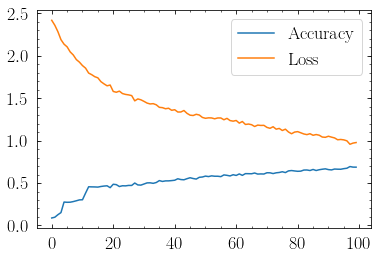

In [12]:
plt.plot(model_hist.history['acc'], label = 'Accuracy')
plt.plot(model_hist.history['loss'], label = 'Loss')
plt.legend()
plt.show()

Training runs very smoothly now.

Todo:
1) Implement a way to sequentially provide training batches, rather than random sample
2) Implement a way to loop over events in training
3) Implement tools to monitor performance. 'Accuracy' is a little bit weak, there are more relevant metrics (e.g. top-2 or top-3 categorical accuracy. It would be interesting to also look at confusion matrices, recall & precision, etc...